In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
data = pd.read_csv("50_Startups.csv")

In [36]:
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [37]:
print(data.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [38]:
data = pd.get_dummies(data, columns=['State'], drop_first=True)

In [39]:
X = data.drop('Profit', axis=1)
y = data['Profit']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

In [42]:
vif_results = calculate_vif(X_train)
print("VIF Results:")
print(vif_results)

VIF Results:
          Variable        VIF
0        R&D Spend   8.858052
1   Administration   4.921770
2  Marketing Spend  10.983201
3    State_Florida   2.249269
4   State_New York   2.059433


In [43]:
X_train = X_train.drop(['Administration', 'State_New York'], axis=1)
X_test = X_test.drop(['Administration', 'State_New York'], axis=1)

In [44]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

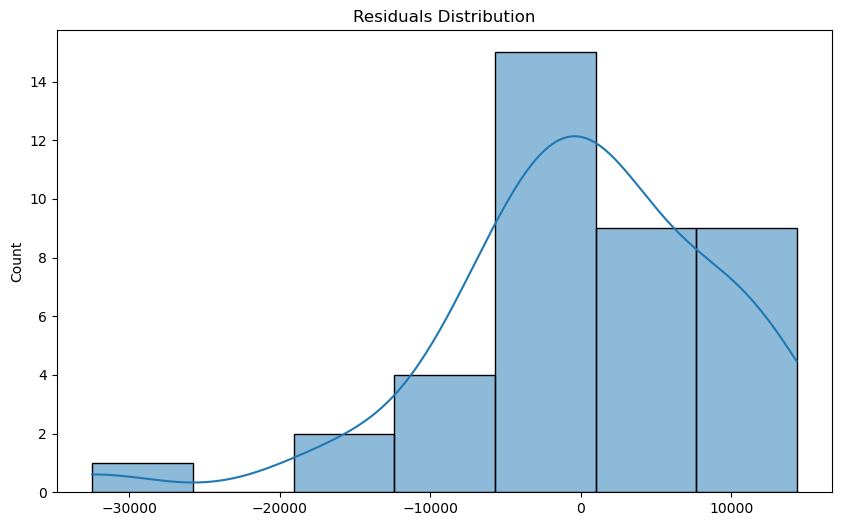

In [45]:
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

In [46]:
y_pred = model.predict(sm.add_constant(X_test))

In [47]:
r_squared = np.corrcoef(y_test, y_pred)[0, 1]**2
print("R-squared value:", r_squared)

R-squared value: 0.9226154468254223


In [48]:
influence = model.get_influence()
cooks_distance = influence.cooks_distance
leverage_cutoff = 4 / len(X_train)

In [50]:
cooks_distance_values = cooks_distance[0]
influential_points = np.where(cooks_distance_values > leverage_cutoff)[0]

In [51]:
X_train = X_train.drop(index=influential_points)
y_train = y_train.drop(index=influential_points)

In [52]:
final_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [53]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     211.7
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.27e-21
Time:                        18:42:07   Log-Likelihood:                -391.00
No. Observations:                  37   AIC:                             790.0
Df Residuals:                      33   BIC:                             796.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.515e+04   3737.034     